# Neural Network Regression

In [1]:
import torch
import scipy.io as io
import plotly.offline as py
import plotly.graph_objs as go
import json
import numpy as np
py.init_notebook_mode(connected=True)

In [2]:
mat = io.loadmat('data_Mg_GBperatom_seg_2Al_dump.mat')
length_A = mat['A'].shape[1]
for i in range(30):
    segE = mat['A']['Eseg'][0,i]
    #check whether this is a valid data?
    n1 = segE[:,0] != 0 
    segE = np.squeeze(segE[n1,:])
    atom_ID = segE[:,0].astype(int) - 1

    descriptor = mat['A']['peratom'][0,i][0,0]
    descriptor_temp = np.concatenate([descriptor['pos'],descriptor['pe'],descriptor['cna'],descriptor['centro_fnn'],
                                descriptor['centro_snn'],descriptor['coord'],descriptor['f'],descriptor['stress'],
                                descriptor['voronoi']], axis = 1)
    if i == 0:
        descriptor_all = descriptor_temp[atom_ID]
        segE_all = segE
    else:
        descriptor_temp = descriptor_temp[atom_ID]
        descriptor_all = np.concatenate([descriptor_all, descriptor_temp], axis = 0)
        segE_all = np.concatenate([segE_all, segE])

descriptor_all[:,2] = abs(descriptor_all[:,2]-min(descriptor_all[:,2])-20)
sigma_H = np.sum(descriptor_all[:,11:14], axis = 1)/3
f_mag = np.linalg.norm(descriptor_all[:,8:11], axis = 1, ord = 2)

feature = np.concatenate([descriptor_all, sigma_H[:,np.newaxis], f_mag[:,np.newaxis]], axis = 1)

In [3]:
y_true = segE_all[:,1]
#We should consider the coordinates don't matter.
feature1 = feature[:,3:]
#feature1 = feature1/np.max(feature1)
#feature_space = np.concatenate([np.ones((feature1.shape[0],1)), feature1], axis = 1)
feature_space = feature1
#random shuffle
np.random.seed(10)
idx0 = np.random.permutation(np.arange(len(feature_space)))
feature_space = feature_space[idx0]
y_true = y_true[idx0]
#divide data into training, crossvalildation and test sets.
X_train = feature_space[0:int(len(feature_space)*.7)]
X_mean = np.mean(X_train, axis = 0)
X_std = np.std(X_train, axis = 0)
X_train = (X_train - X_mean)/X_std
X_temp = feature_space[int(len(feature_space)*.7):]
X_temp = (X_temp - X_mean)/X_std
X_cos = X_temp[:int(len(X_temp)*.5)]
X_test = X_temp[int(len(X_temp)*.5):]
Y_train = y_true[0:int(len(feature_space)*.7)]
Y_mean = np.mean(Y_train, axis = 0)
Y_std = np.std(Y_train, axis = 0)
#Y_train = (Y_train - Y_mean)/Y_std
Y_temp = y_true[int(len(feature_space)*.7):]
#Y_temp = (Y_temp - Y_mean)/Y_std
Y_cos = Y_temp[:int(len(X_temp)*.5)]
Y_test = Y_temp[int(len(X_temp)*.5):]


In [4]:
(N, D_in) = X_train.shape
H = 10
D_out = 1

X_train = torch.from_numpy(X_train)
X_train = X_train.float()
y = torch.from_numpy(Y_train)
y = y.float()
y = y.view(y.shape[0],1)
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)
    

In [5]:
for t in range(50000):
    y_pred = model(X_train)
    
    loss = loss_fn(y_pred, y)
    if t%1000 == 0:
        print(t, loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

0 672.0970458984375
1000 1.988547682762146
2000 1.473117709159851
3000 1.3811416625976562
4000 1.3491579294204712
5000 1.3245548009872437
6000 1.3053405284881592
7000 1.2814784049987793
8000 1.250533938407898
9000 1.224557876586914
10000 1.2033860683441162
11000 1.1939867734909058
12000 1.1894131898880005
13000 1.1865146160125732
14000 1.1833750009536743
15000 1.1772119998931885
16000 1.1728590726852417
17000 1.1683098077774048
18000 1.1628072261810303
19000 1.1595675945281982
20000 1.1580606698989868
21000 1.15617036819458
22000 1.1548068523406982
23000 1.1534428596496582
24000 1.1486924886703491
25000 1.1406514644622803
26000 1.1372560262680054
27000 1.134730339050293
28000 1.1323935985565186
29000 1.1304490566253662
30000 1.1295549869537354
31000 1.1291569471359253
32000 1.1278916597366333
33000 1.126395583152771
34000 1.1249607801437378
35000 1.1239365339279175
36000 1.1231904029846191
37000 1.1224157810211182
38000 1.1215695142745972
39000 1.1204962730407715
40000 1.11965930461883

In [6]:
for t in range(50000):
    y_pred = model(X_train)
    
    loss = loss_fn(y_pred, y)
    if t%1000 == 0:
        print(t, loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

0 1.1151342391967773
1000 1.1149052381515503
2000 1.1146820783615112
3000 1.1145853996276855
4000 1.114515781402588
5000 1.1143697500228882
6000 1.1143053770065308
7000 1.1141273975372314
8000 1.1139836311340332
9000 1.113754153251648
10000 1.1135262250900269
11000 1.11333167552948
12000 1.1128032207489014
13000 1.1072391271591187
14000 1.1002414226531982
15000 1.096008062362671
16000 1.093408465385437
17000 1.0905938148498535
18000 1.0888766050338745
19000 1.0873277187347412
20000 1.086198329925537
21000 1.0857013463974
22000 1.0854047536849976
23000 1.0849443674087524
24000 1.0825026035308838
25000 1.0817272663116455
26000 1.0813579559326172
27000 1.081076979637146
28000 1.0808765888214111
29000 1.0805399417877197
30000 1.0803706645965576
31000 1.080223798751831
32000 1.0797971487045288
33000 1.079127550125122
34000 1.0789127349853516
35000 1.0787391662597656
36000 1.0786343812942505
37000 1.078554391860962
38000 1.0784863233566284
39000 1.078425645828247
40000 1.0783824920654297
410

In [ ]:
X_test = torch.from_numpy(X_test)
X_test = X_test.float()
Y_test_pred = model(X_test)
Y_test_pred = Y_test_pred.detach().numpy()
Y_test_pred = Y_test_pred.squeeze()
Y_test = Y_test.squeeze()

In [23]:
Y_trainpred = model(X_train)
Y_trainpred = Y_trainpred.detach()
Y_trainpred = Y_trainpred.numpy().squeeze()

In [24]:
abs(Y_trainpred - Y_train)

array([0.01224557, 0.00015951, 0.00145214, ..., 0.00141648, 0.04014589,
       0.00200345])

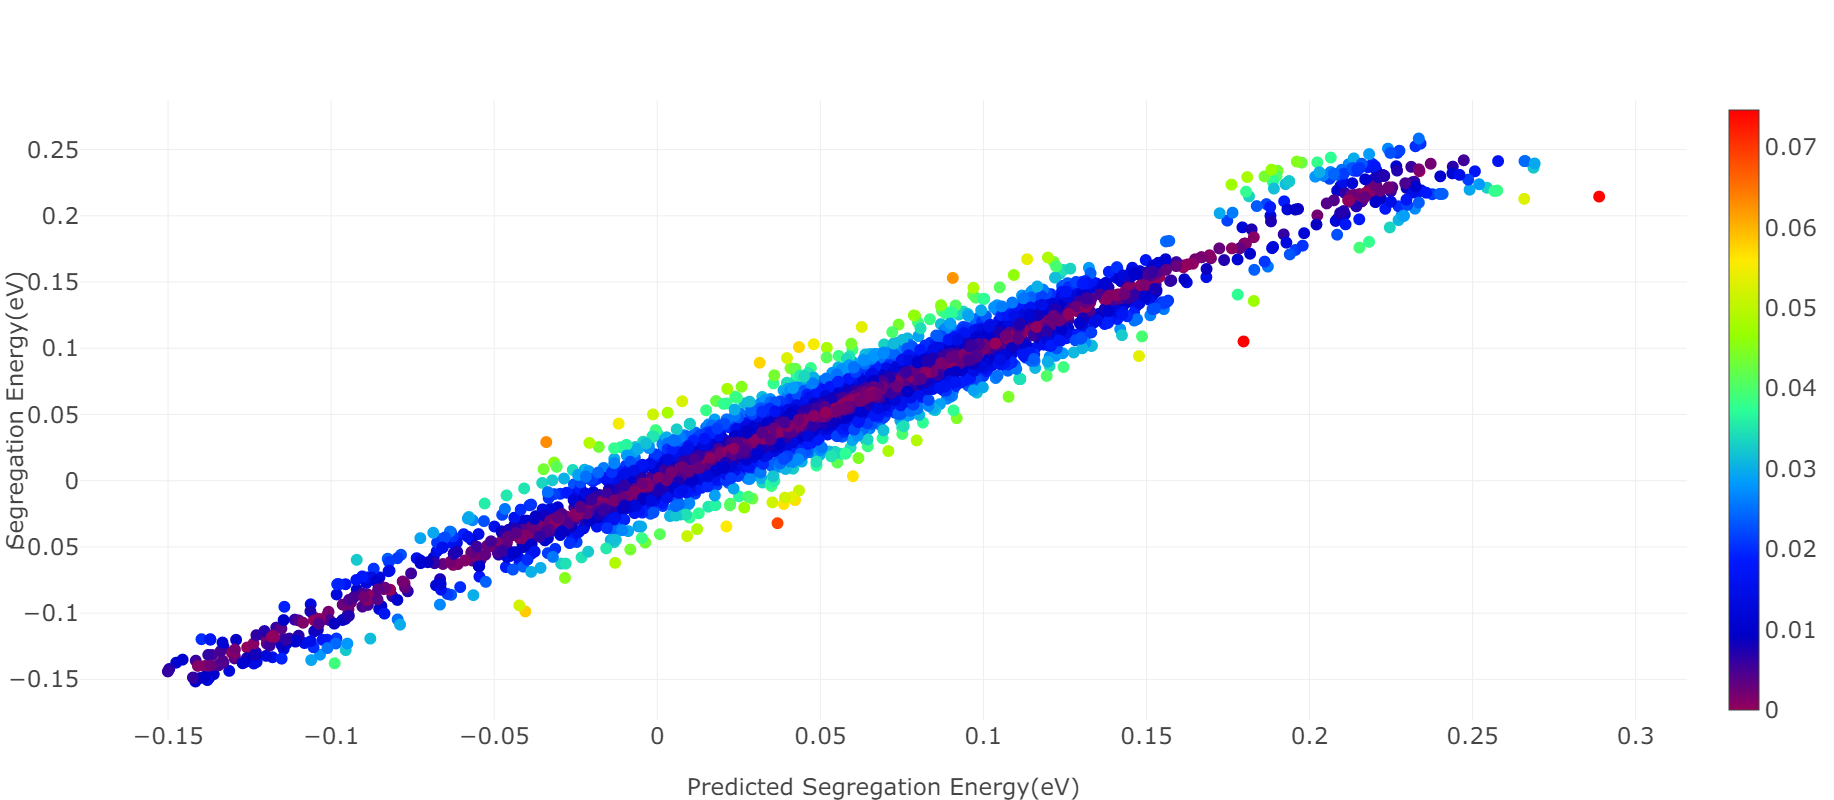

In [25]:
# training set
main = go.Scatter(x = Y_trainpred, 
                y = Y_train,
                text = np.around(abs(Y_trainpred-Y_train),3).tolist(),
                hoverinfo = 'text',
                marker={'size':12, 'color':abs(Y_trainpred-Y_train), 'colorscale':'Rainbow' ,
                'symbol':'circle','showscale':True, 'colorbar':dict(tickfont = dict(size = 23))}, 
                mode='markers'
                )
data = [main]

layout = go.Layout(autosize = False,
            height = 800,
            width = 800,     
            xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            )
fig = go.Figure(data = data, layout = layout)
plot = py.iplot(fig)

In [19]:
#X_cos = torch.from_numpy(X_cos)
X_cos = X_cos.float()
Y_cospred = model(X_cos)
Y_cospred = Y_cospred.detach()
Y_cospred = Y_cospred.numpy().squeeze()

In [15]:
Y_cos.shape

(2135,)

In [20]:
Y_cospred.shape

(2135,)

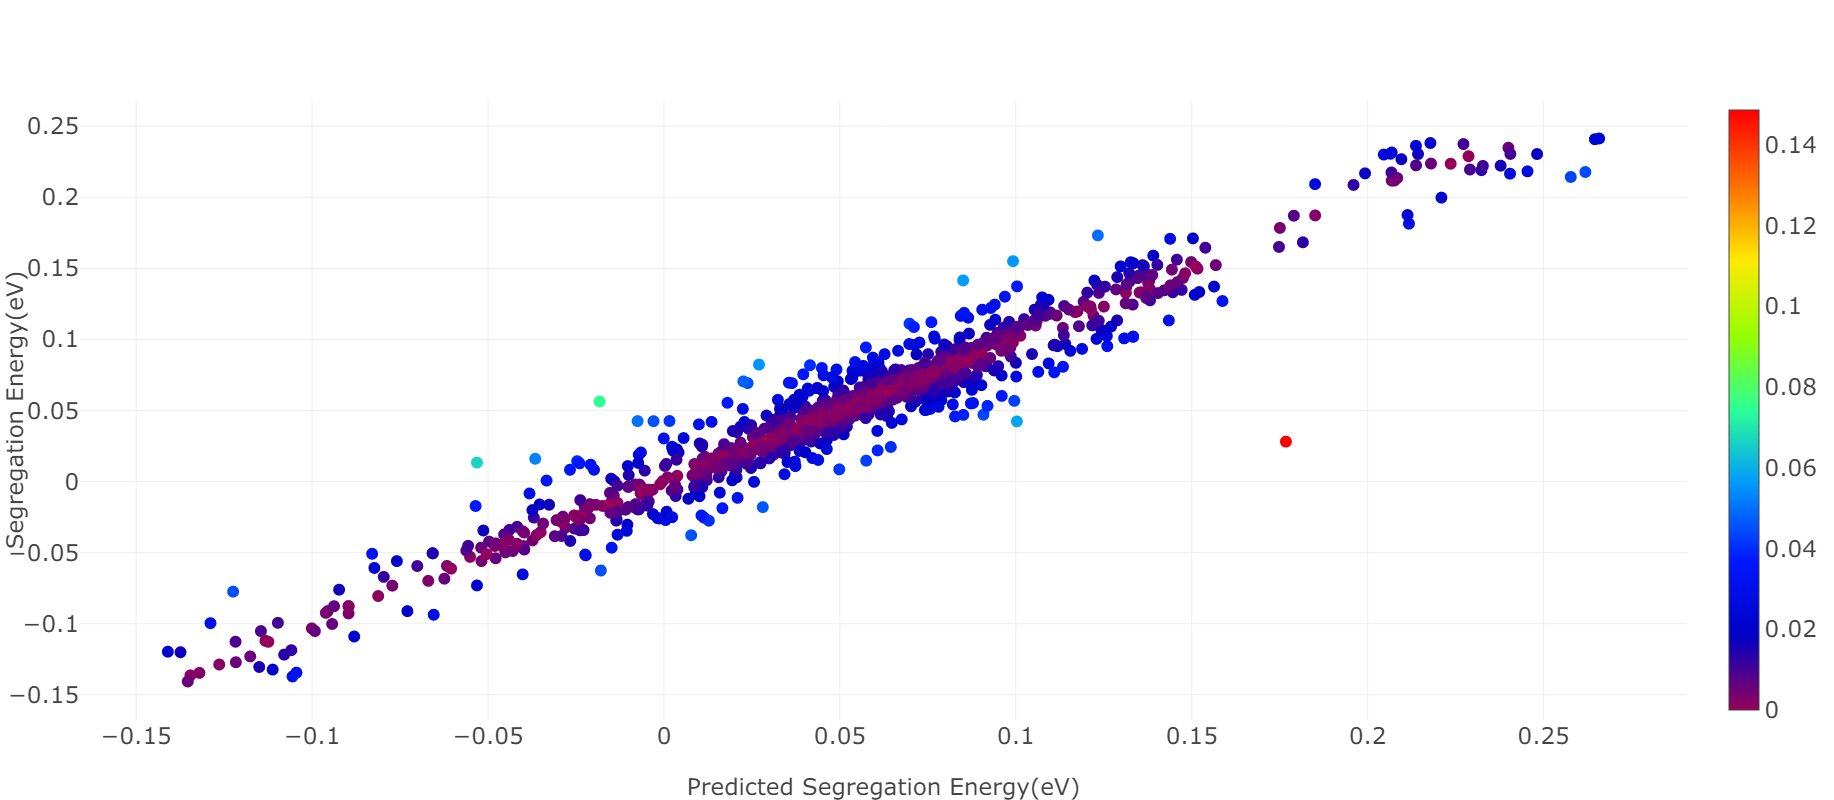

In [22]:
# cross validation set
main = go.Scatter(x = Y_cospred, 
                y = Y_cos,
                text = np.around(abs(Y_cospred-Y_cos),3).tolist(),
                hoverinfo = 'text',
                marker={'size':12, 'color':abs(Y_cospred-Y_cos), 'colorscale':'Rainbow' ,
                'symbol':'circle','showscale':True, 'colorbar':dict(tickfont = dict(size = 23))}, 
                mode='markers'
                )
data = [main]

layout = go.Layout(autosize = False,
            height = 800,
            width = 800,     
            xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            )
fig = go.Figure(data = data, layout = layout)
plot = py.iplot(fig)

In [ ]:
main = go.Scatter(x = Y_test_pred, 
                y = Y_test,
                text = np.around(abs(Y_test_pred-Y_test),3).tolist(),
                hoverinfo = 'text',
                marker={'size':12, 'color':abs(Y_test_pred-Y_test), 'colorscale':'Rainbow' ,
                'symbol':'circle','showscale':True, 'colorbar':dict(tickfont = dict(size = 23))}, 
                mode='markers'
                )
data = [main]

layout = go.Layout(autosize = False,
            height = 800,
            width = 800,     
            xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            )
fig = go.Figure(data = data, layout = layout)
plot = py.iplot(fig)

In [26]:
#training set
Y_mean = np.mean(Y_train)
SS_tot = torch.sum(torch.pow(y - Y_mean, 2))
SS_res = torch.sum(torch.pow(y_pred-y, 2))
R_squared = 1-SS_res/SS_tot
R_squared = 1-(1-R_squared)*(X_train.shape[0]-1)/(X_train.shape[0]-1-X_train.shape[1])

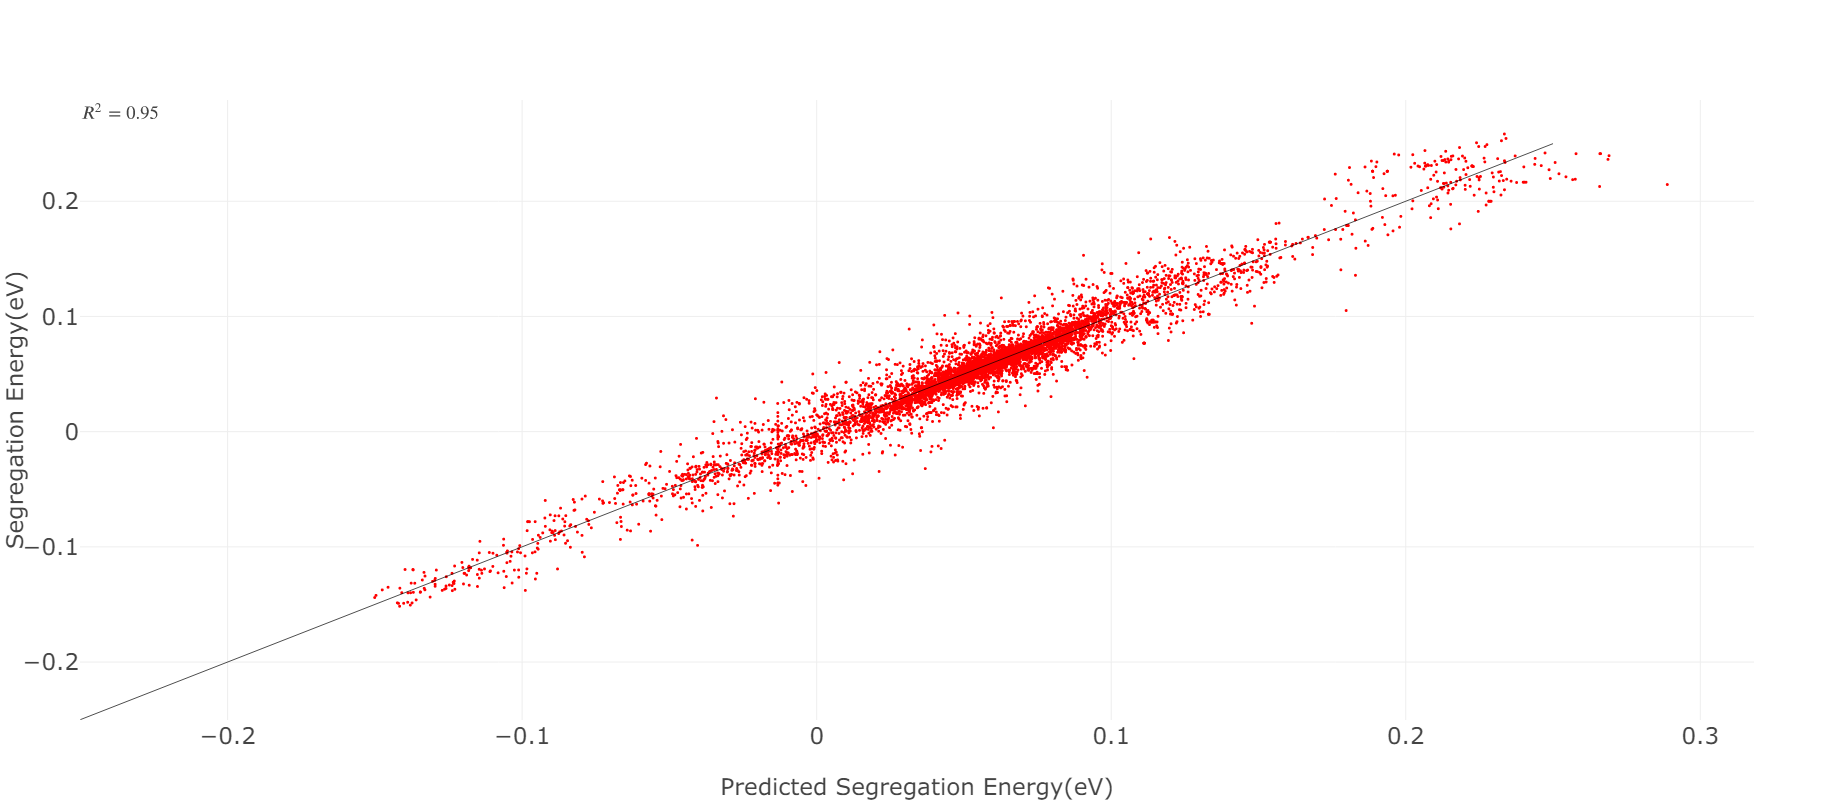

In [27]:
#training set
main = go.Scatter(x = Y_trainpred, 
          y = Y_train, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
        yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 23)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':0.25,
                            'y0':-0.25,
                            'y1':0.25,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

In [31]:
#cross validation set
Y_mean = np.mean(Y_cos)
SS_tot = np.sum(np.power(Y_cos - Y_mean, 2))
SS_res = np.sum(np.power(Y_cospred - Y_cos, 2))
R_squared = 1-SS_res/SS_tot
R_squared = 1-(1-R_squared)*(X_train.shape[0]-1)/(X_train.shape[0]-1-X_train.shape[1])

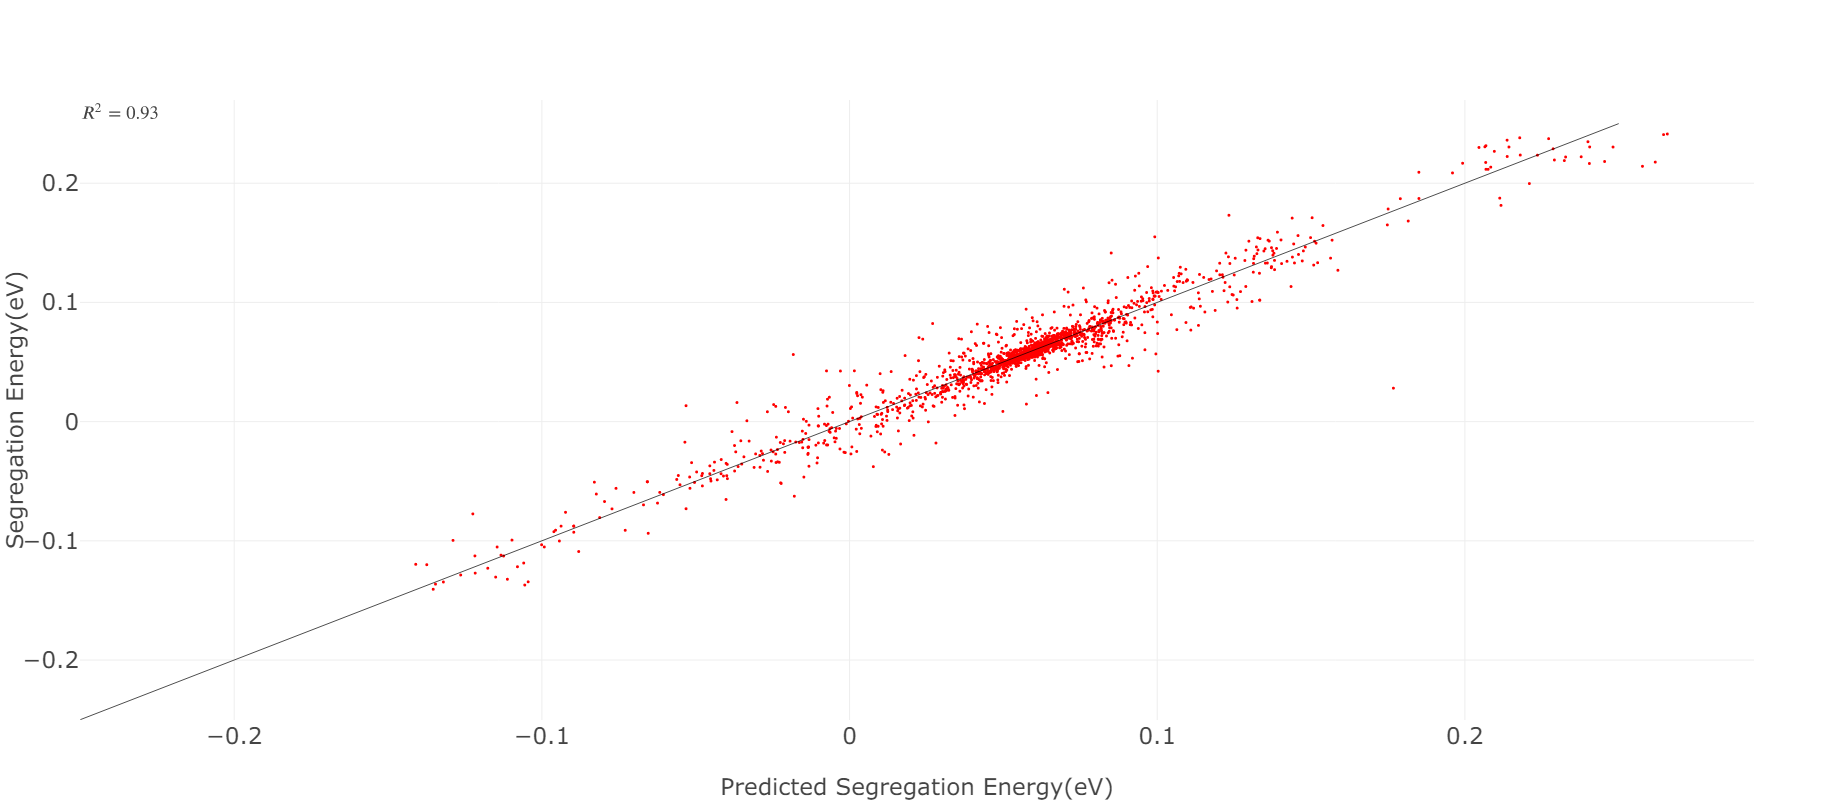

In [32]:
#cross validation set
main = go.Scatter(x = Y_cospred, 
          y = Y_cos, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
        yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 23)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':0.25,
                            'y0':-0.25,
                            'y1':0.25,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

In [ ]:
#test set
Y_mean = np.mean(Y_test)
SS_tot = np.sum(np.power(Y_test - Y_mean, 2))
SS_res = np.sum(np.power(Y_test_pred - Y_test, 2))
R_squared = 1-SS_res/SS_tot
R_squared = 1-(1-R_squared)*(X_train.shape[0]-1)/(X_train.shape[0]-1-X_train.shape[1])

In [ ]:
#draw correlation
main = go.Scatter(x = Y_test_pred, 
          y = Y_test, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
        yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 23)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':0.25,
                            'y0':-0.25,
                            'y1':0.25,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

In [ ]:
PATH = 'model.pt'
torch.save(model, PATH)

# Three Layer Neural Network

In [36]:
y_true = segE_all[:,1]
#We should consider the coordinates don't matter.
pos = feature[:,:3]
feature1 = feature[:,3:]

#feature1 = feature1/np.max(feature1)
#feature_space = np.concatenate([np.ones((feature1.shape[0],1)), feature1], axis = 1)
feature_space = feature1
#random shuffle
np.random.seed(10)
idx0 = np.random.permutation(np.arange(len(feature_space)))
pos = pos[idx0]
feature_space = feature_space[idx0]
y_true = y_true[idx0]
#divide data into training, crossvalildation and test sets.
X_train = feature_space[0:int(len(feature_space)*.7)]
X_mean = np.mean(X_train, axis = 0)
X_std = np.std(X_train, axis = 0)
X_train = (X_train - X_mean)/X_std
X_temp = feature_space[int(len(feature_space)*.7):]
X_temp = (X_temp - X_mean)/X_std
X_cos = X_temp[:int(len(X_temp)*.5)]
X_test = X_temp[int(len(X_temp)*.5):]
Y_train = y_true[0:int(len(feature_space)*.7)]
Y_mean = np.mean(Y_train, axis = 0)
Y_std = np.std(Y_train, axis = 0)
#Y_train = (Y_train - Y_mean)/Y_std
Y_temp = y_true[int(len(feature_space)*.7):]
#Y_temp = (Y_temp - Y_mean)/Y_std
Y_cos = Y_temp[:int(len(X_temp)*.5)]
Y_test = Y_temp[int(len(X_temp)*.5):]
pos_test = pos[int(len(pos)*.85):,:]



In [37]:
(N, D_in) = X_train.shape
H = 40
D_out = 1

X_train = torch.from_numpy(X_train)
X_train = X_train.float()
y = torch.from_numpy(Y_train)
y = y.float()
y = y.view(y.shape[0],1)
model1 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn1 = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer1 = torch.optim.SGD(model1.parameters(), lr = learning_rate, momentum = 0.9, weight_decay = 1)#0.2
    

## Training


In [38]:
for t in range(50000):
    y_pred = model1(X_train)
    
    loss = loss_fn1(y_pred, y)
    if t%500 == 0:
        print(t, loss.item())
    
    optimizer1.zero_grad()
    
    loss.backward()
    
    optimizer1.step()

0 39.826358795166016
500 1.2738908529281616
1000 1.0695089101791382
1500 1.0050896406173706
2000 0.969239354133606
2500 0.9438491463661194
3000 0.9207044243812561
3500 0.9077441692352295
4000 0.8986445665359497
4500 0.8892210125923157
5000 0.8825470805168152
5500 0.8749417662620544
6000 0.8704460263252258
6500 0.8664166927337646
7000 0.8642072081565857
7500 0.8628511428833008
8000 0.8619043827056885
8500 0.8608717918395996
9000 0.8590970039367676
9500 0.8572314977645874
10000 0.8561939597129822
10500 0.8550812005996704
11000 0.8533672094345093
11500 0.8522724509239197
12000 0.8520545363426208
12500 0.8516404628753662
13000 0.8513489365577698
13500 0.8508609533309937
14000 0.8505455851554871
14500 0.8506297469139099
15000 0.8502874970436096
15500 0.849814236164093
16000 0.8492931723594666
16500 0.8491067290306091
17000 0.8489903807640076
17500 0.8489713668823242
18000 0.8490450382232666
18500 0.8493571281433105
19000 0.8489403128623962
19500 0.8487488627433777
20000 0.8487983345985413
2

In [ ]:
loss.item()/X_train.shape[0]*1e5

## Cross Validation

In [ ]:
# X_cos = torch.from_numpy(X_cos)
# X_cos = X_cos.float()
# Y_cos_pred = model1(X_cos)
# Y_cos_pred = Y_cos_pred.detach().numpy()
# Y_cos_pred = Y_cos_pred.squeeze()
# Y_cos = Y_cos.squeeze()
# Y_mean = np.mean(Y_cos)
# SS_tot = np.sum(np.power(Y_cos - Y_mean, 2))
# SS_res = np.sum(np.power(Y_cos_pred - Y_cos, 2))
# R_squared = 1-SS_res/SS_tot

In [ ]:
# R_squared

In [ ]:
#draw correlation
# main = go.Scatter(x = Y_cos_pred, 
#           y = Y_cos, 
#           marker={'color':'red', 'symbol':'circle','size':3}, 
#           mode='markers'
#          )

# data = [main]

# layout = go.Layout(autosize = False, 
#            height = 800,
#            width = 800, 
#            xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False},
#            yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False},
#            annotations = [
#                    dict(
#                    x = 0,
#                    y = 1,
#                    xref = 'paper',
#                    yref = 'paper',
#                    text = '$R^2= %4.2f$'%(R_squared),
#                    showarrow = False,
#                    font = dict(size = 12)
#                    )
#                ],
#            shapes =[{'type':'line', 
#                             'x0':-0.25,
#                             'x1':0.25,
#                             'y0':-0.25,
#                             'y1':0.25,
#                             'line':{'width':0.7}
#                     }],
#           )
# plot = py.iplot(go.Figure(data = data, layout = layout))

In [39]:
# training set
Y_trainpred = model(X_train)
Y_trainpred = Y_trainpred.detach()
Y_trainpred = Y_trainpred.numpy().squeeze()

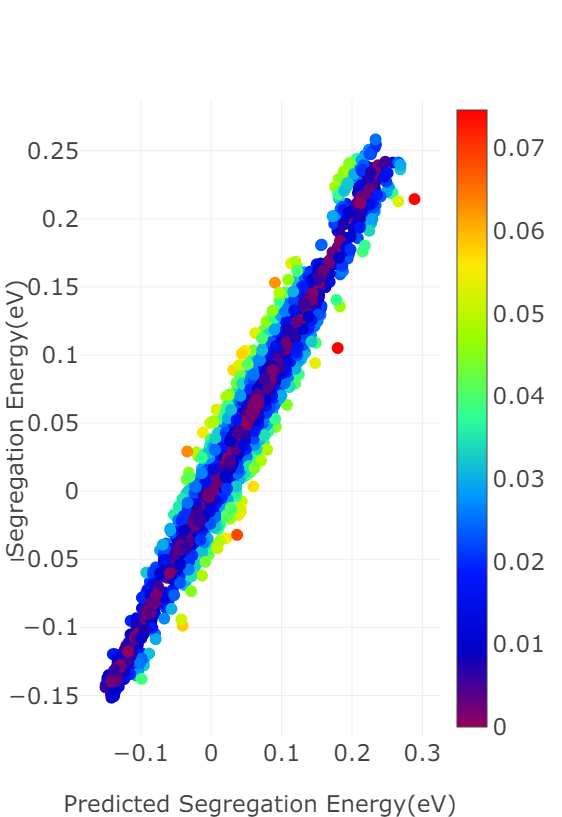

In [40]:
# training set
main = go.Scatter(x = Y_trainpred, 
                y = Y_train,
                text = np.around(abs(Y_trainpred-Y_train),3).tolist(),
                hoverinfo = 'text',
                marker={'size':12, 'color':abs(Y_trainpred-Y_train), 'colorscale':'Rainbow' ,
                'symbol':'circle','showscale':True, 'colorbar':dict(tickfont = dict(size = 23))}, 
                mode='markers'
                )
data = [main]

layout = go.Layout(autosize = False,
            height = 800,
            width = 800,     
            xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            )
fig = go.Figure(data = data, layout = layout)
plot = py.iplot(fig)

In [41]:
X_cos = torch.from_numpy(X_cos)
X_cos = X_cos.float()
Y_cospred = model(X_cos)
Y_cospred = Y_cospred.detach()
Y_cospred = Y_cospred.numpy().squeeze()

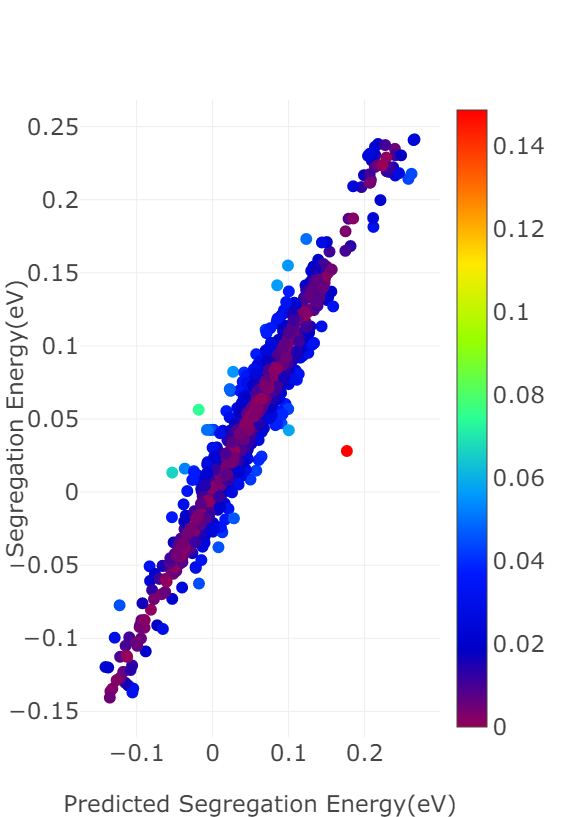

In [42]:
# cross validation set
main = go.Scatter(x = Y_cospred, 
                y = Y_cos,
                text = np.around(abs(Y_cospred-Y_cos),3).tolist(),
                hoverinfo = 'text',
                marker={'size':12, 'color':abs(Y_cospred-Y_cos), 'colorscale':'Rainbow' ,
                'symbol':'circle','showscale':True, 'colorbar':dict(tickfont = dict(size = 23))}, 
                mode='markers'
                )
data = [main]

layout = go.Layout(autosize = False,
            height = 800,
            width = 800,     
            xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            )
fig = go.Figure(data = data, layout = layout)
plot = py.iplot(fig)

## Test

In [ ]:
X_test = torch.from_numpy(X_test)
X_test = X_test.float()
Y_test_pred = model1(X_test)
Y_test_pred = Y_test_pred.detach().numpy()
Y_test_pred = Y_test_pred.squeeze()
Y_test = Y_test.squeeze()
Y_mean = np.mean(Y_test)
SS_tot = np.sum(np.power(Y_test - Y_mean, 2))
SS_res = np.sum(np.power(Y_test_pred - Y_test, 2))
R_squared = 1-SS_res/SS_tot
R_squared = 1-(1-R_squared)*(X_train.shape[0]-1)/(X_train.shape[0]-1-X_train.shape[1])
Ep = np.divide(abs(Y_test_pred-Y_test), abs(Y_test))

In [ ]:
main = go.Scatter(x = Y_test_pred, 
                y = Y_test,
                text = np.around(abs(Y_test_pred-Y_test),3).tolist(),
                hoverinfo = 'text',
                marker={'size':12, 'color':abs(Y_test_pred-Y_test), 'colorscale':'Rainbow' ,
                'symbol':'circle','showscale':True, 'colorbar':dict(tickfont = dict(size = 23))}, 
                mode='markers'
                )
data = [main]

layout = go.Layout(autosize = False,
            height = 800,
            width = 800,     
            xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
            )
fig = go.Figure(data = data, layout = layout)
plot = py.iplot(fig)

In [ ]:
R_squared

In [ ]:
 main = go.Scatter(x = pos_test[:,0], 
                y = pos_test[:,2],
                text = np.around(Ep,3).tolist(),
                hoverinfo = 'text',
                marker={'size':Ep/1.5, 'color':Ep, 'colorscale':'Rainbow' ,
                'symbol':'circle','showscale':True}, 
                mode='markers'
                )
data = [main]

layout = go.Layout(autosize = False,
                    height = 800,
                    width = 1200/np.ptp(pos_test[:,2])*np.ptp(pos_test[:,0]),     
                    xaxis={'zeroline':False,'tickfont':dict(size = 23) },
                    yaxis = {'zeroline':False,'tickfont':dict(size = 23)}   
                    )
fig = go.Figure(data = data, layout = layout)
plot = py.iplot(fig)

In [43]:
#training set
Y_mean = np.mean(Y_train)
SS_tot = torch.sum(torch.pow(y - Y_mean, 2))
SS_res = torch.sum(torch.pow(y_pred-y, 2))
R_squared = 1-SS_res/SS_tot
R_squared = 1-(1-R_squared)*(X_train.shape[0]-1)/(X_train.shape[0]-1-X_train.shape[1])

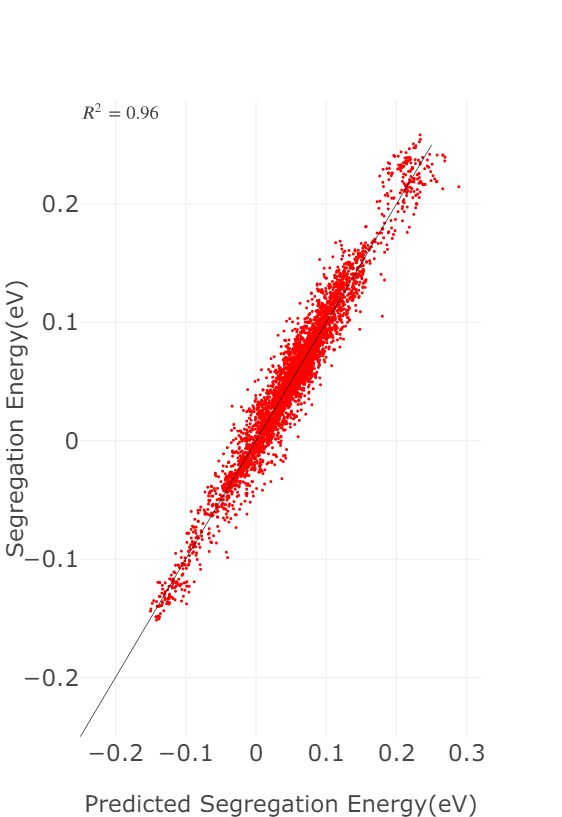

In [44]:
#training set
main = go.Scatter(x = Y_trainpred, 
          y = Y_train, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
        yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 23)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':0.25,
                            'y0':-0.25,
                            'y1':0.25,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

In [45]:
#cross validation set
Y_mean = np.mean(Y_cos)
SS_tot = np.sum(np.power(Y_cos - Y_mean, 2))
SS_res = np.sum(np.power(Y_cospred - Y_cos, 2))
R_squared = 1-SS_res/SS_tot
R_squared = 1-(1-R_squared)*(X_train.shape[0]-1)/(X_train.shape[0]-1-X_train.shape[1])

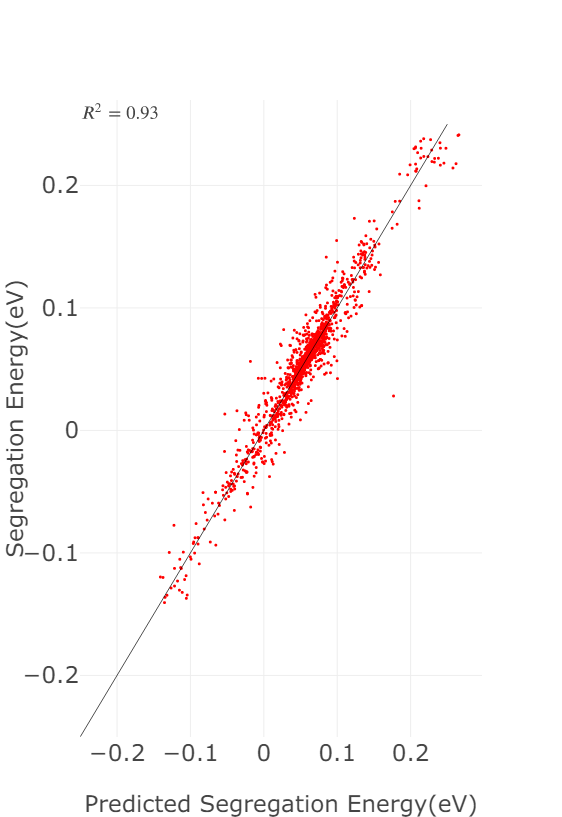

In [46]:
#cross validation set
main = go.Scatter(x = Y_cospred, 
          y = Y_cos, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
        yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 23)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':0.25,
                            'y0':-0.25,
                            'y1':0.25,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

In [ ]:
#test set
Y_mean = np.mean(Y_test)
SS_tot = np.sum(np.power(Y_test - Y_mean, 2))
SS_res = np.sum(np.power(Y_test_pred - Y_test, 2))
R_squared = 1-SS_res/SS_tot
R_squared = 1-(1-R_squared)*(X_train.shape[0]-1)/(X_train.shape[0]-1-X_train.shape[1])

In [ ]:
#draw correlation
main = go.Scatter(x = Y_test_pred, 
          y = Y_test, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
        yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False, 'titlefont':dict(size = 23), 'tickfont':dict(size = 23)},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 23)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':0.25,
                            'y0':-0.25,
                            'y1':0.25,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

In [ ]:
PATH = 'model_layers.pt'
torch.save(model, PATH)